In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# dividindo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
X_train

array([[ 4.6,  3.6],
       [ 5.7,  4.4],
       [ 6.7,  3.1],
       [ 4.8,  3.4],
       [ 4.4,  3.2],
       [ 6.3,  2.5],
       [ 6.4,  3.2],
       [ 5.2,  3.5],
       [ 5. ,  3.6],
       [ 5.2,  4.1],
       [ 5.8,  2.7],
       [ 6. ,  3.4],
       [ 6.7,  3.1],
       [ 5.4,  3.9],
       [ 5.4,  3.7],
       [ 5.5,  2.4],
       [ 6.3,  2.8],
       [ 6.4,  3.1],
       [ 6.6,  3. ],
       [ 7.2,  3.6],
       [ 5.7,  2.9],
       [ 7.6,  3. ],
       [ 5.6,  3. ],
       [ 5.1,  3.5],
       [ 7.7,  2.8],
       [ 5.8,  2.7],
       [ 5.2,  3.4],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 5. ,  2. ],
       [ 6.3,  2.7],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5.1,  3.3],
       [ 5.6,  2.7],
       [ 5.1,  3.4],
       [ 5.7,  3. ],
       [ 7.7,  3.8],
       [ 4.6,  3.2],
       [ 6.2,  2.9],
       [ 5.7,  2.5],
       [ 5.5,  4.2],
       [ 6. ,  3. ],
       [ 5.8,  2.7],
       [ 6. ,  2.2],
       [ 5.4,  3. ],
       [ 6.2,  3.4],
       [ 5.5,

In [4]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1,
       0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1,
       2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0,
       1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 0, 1, 2])

In [5]:
classifier = SVC(kernel='rbf', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [6]:
acc = accuracy_score(y_test, y_pred)
acc

0.90000000000000002

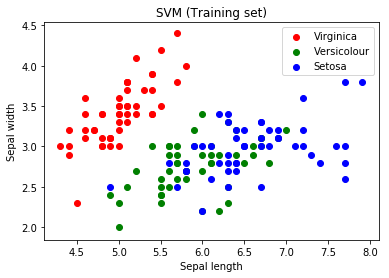

In [7]:
#visualizando os dados

plt.scatter(X[y == 0,0], X[y == 0,1], c = 'red', label='Virginica')
plt.scatter(X[y == 1,0], X[y == 1,1], c = 'green', label='Versicolour')
plt.scatter(X[y == 2,0], X[y == 2,1], c = 'blue', label='Setosa')
plt.title('SVM (Training set)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

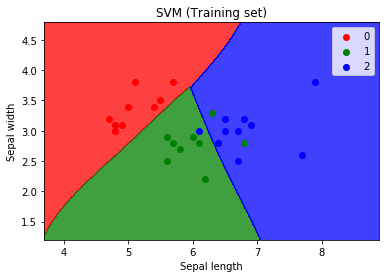

In [8]:
# visualizando a fronteira de decisão

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
xx, yy = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(xx, yy, classifier.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()